## IMPORTANT LIBRARIES

In [1]:
# Modules to ignore warnings
import warnings               
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os   
import shutil


import numpy as np    # For array operations
import pandas as pd   # For DataFrames
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt    # For plotting%matplotlib inline
from subprocess import call
import seaborn as sns
from datetime import date


import scipy.stats as sps



from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import *# to import all images
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#to import inception image v3
from keras.applications.inception_v3 import InceptionV3
# to store weights after every 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
# if there are ten classes then it is ten hote encoding
from keras.utils import to_categorical
from collections import Counter

import datetime as dt
from datetime import datetime
import time
from datetime import date
import calendar

from collections import Counter
from scipy import stats
from itertools import groupby
from operator import itemgetter

Using TensorFlow backend.


In [2]:
##READING TRAIN AND TEST DATA

In [3]:
Train_data = pd.read_csv('train_LZdllcl.csv', index_col=0)

In [4]:
Test_data = pd.read_csv('test_2umaH9m.csv', index_col=0)

In [5]:
print('shape of Train_data:{}\n'.format((Train_data.shape)))
print('shape of Test_data:{}\n'.format((Test_data.shape)))

shape of Train_data:(54808, 13)

shape of Test_data:(23490, 12)



In [6]:
##CHECKING IF TRAIN AND TEST DATA WAS READ PROPERILY

In [7]:
#check if train data was read properly
print("Head of Train_data:\n",Train_data.head(3))
print("Head of Test_data:\n",Test_data.head(3))

Head of Train_data:
                     department     region         education gender  \
employee_id                                                          
65438        Sales & Marketing   region_7  Master's & above      f   
65141               Operations  region_22        Bachelor's      m   
7513         Sales & Marketing  region_19        Bachelor's      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
65438                  sourcing                1   35                   5.0   
65141                     other                1   30                   5.0   
7513                   sourcing                1   34                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                        8              1            0   
65141                        4              0 

# DESCRIPTIVE STATISTICS

In [8]:
Train_data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
Test_data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [10]:
Train_data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
Test_data.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [13]:
Train_data= Train_data.replace('', np.nan, regex=True)

In [14]:
Test_data= Test_data.replace('', np.nan, regex=True)

In [15]:
num_attribute = Train_data.select_dtypes(include='number').columns.tolist()
cat_attributes = Train_data.columns.difference(num_attribute).tolist()

In [16]:
num_attribute = Test_data.select_dtypes(include='number').columns.tolist()
cat_attributes = Test_data.columns.difference(num_attribute).tolist()

In [17]:
Train_data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [18]:
Test_data.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [19]:
##Imputing NaN in education with BENCH MARK

In [20]:
print('Missing values in Train - education :',Train_data['education'].isnull().sum())
Train_data['education']=Train_data['education'].fillna('bench')
print('Missing values in Train - education, after Imputation :',Train_data['education'].isnull().sum())

Missing values in Train - education : 2409
Missing values in Train - education, after Imputation : 0


In [21]:
print('Missing values in Test - education :',Test_data['education'].isnull().sum())
Test_data['education']=Test_data['education'].fillna('bench')
print('Missing values in Train - education, after Imputation :',Test_data['education'].isnull().sum())

Missing values in Test - education : 1034
Missing values in Train - education, after Imputation : 0


In [22]:
## Imputing NaN in previous_year_rating with Mean
print('Missing values in Train - previous_year_rating :',Train_data['previous_year_rating'].isnull().sum())
Train_data['previous_year_rating'].fillna(Train_data['previous_year_rating'].mean(),inplace=True)
print('Missing values in Train - previous_year_rating, after MeanImputation :',Train_data['previous_year_rating'].isnull().sum())

Missing values in Train - previous_year_rating : 4124
Missing values in Train - previous_year_rating, after MeanImputation : 0


In [23]:
## Imputing NaN in previous_year_rating with Mean
print('Missing values in Train - previous_year_rating :',Test_data['previous_year_rating'].isnull().sum())
Test_data['previous_year_rating'].fillna(Test_data['previous_year_rating'].mean(),inplace=True)
print('Missing values in Train - previous_year_rating, after MeanImputation :',Test_data['previous_year_rating'].isnull().sum())

Missing values in Train - previous_year_rating : 1812
Missing values in Train - previous_year_rating, after MeanImputation : 0


In [24]:
print('Non-zero target values %:', round(Train_data['is_promoted'].mean() * 100, 2))

Non-zero target values %: 8.52


In [25]:
Train_data.groupby('KPIs_met >80%')['is_promoted'].mean()

KPIs_met >80%
0    0.039587
1    0.169094
Name: is_promoted, dtype: float64

In [26]:
##correlation matrices

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.153406
length_of_service      -0.010670
age                    -0.017166
no_of_trainings        -0.024896
Name: is_promoted, dtype: float64

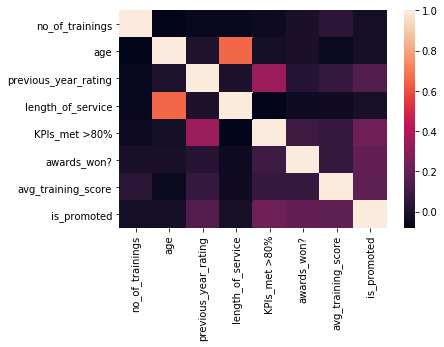

In [27]:
import seaborn as sns
corr = Train_data.corr()
sns.heatmap(corr)
corr['is_promoted'].sort_values(ascending=False)

In [28]:
Train_data.drop(['length_of_service','age', 'no_of_trainings'], axis=1, inplace=True)
Test_data.drop(['length_of_service','age', 'no_of_trainings'], axis=1, inplace=True)

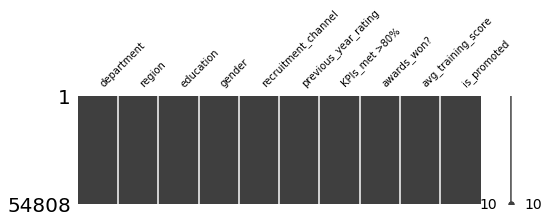

In [29]:
# visualization of missing values

import missingno as msno
msno.matrix(Train_data,figsize=(8,2),fontsize=10)

In [30]:
Train_data.sort_values(["department"], axis=0, 
                 ascending=True, inplace=True)

In [31]:
Train_data

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,
55910,Analytics,region_32,Bachelor's,m,other,3.329256,0,0,88,0
26877,Analytics,region_15,Bachelor's,m,sourcing,1.000000,0,0,85,0
28997,Analytics,region_13,Bachelor's,m,other,5.000000,1,0,82,0
58178,Analytics,region_28,Bachelor's,m,sourcing,1.000000,0,0,84,0
65932,Analytics,region_15,Master's & above,m,other,4.000000,0,0,86,0
38848,Analytics,region_30,Bachelor's,m,other,5.000000,1,0,83,0
61258,Analytics,region_29,Bachelor's,m,other,3.000000,0,0,84,0
14291,Analytics,region_5,Bachelor's,m,other,3.000000,0,0,79,0
25141,Analytics,region_22,Bachelor's,m,sourcing,3.000000,0,0,84,0


In [32]:
##PLOTTING

C:\Users\THOUSEEF\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


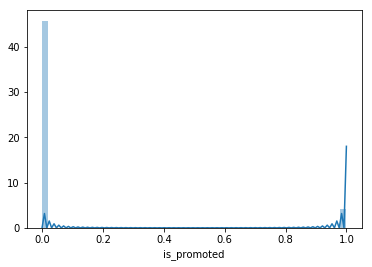

In [33]:
sns.distplot(Train_data["is_promoted"])

In [34]:
Train_data["previous_year_rating_bin"] = pd.cut(Train_data["previous_year_rating"],bins=[-5.00,-1.00,0.00, 1.00, 5.00])
Test_data["previous_year_rating_bin"] = pd.cut(Test_data["previous_year_rating"],bins=[-5.00,-1.00,0.00, 1.00, 5.00])

3.000000    18618
5.000000    11741
4.000000     9877
1.000000     6223
2.000000     4225
3.329256     4124
Name: previous_year_rating, dtype: int64


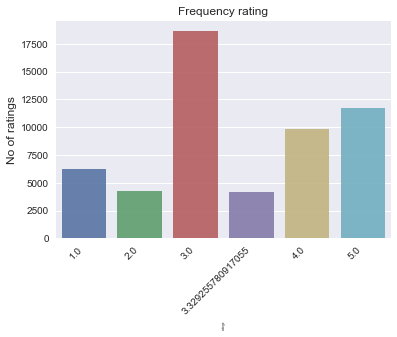

In [35]:
print(Train_data["previous_year_rating"].value_counts())

payout_count= Train_data["previous_year_rating"].value_counts()
sns.set(style="darkgrid")
chart= sns.barplot(payout_count.index, payout_count.values, alpha=0.9)

plt.title('Frequency rating')
plt.ylabel('No of ratings', fontsize=12)
plt.xlabel('ratings', fontsize=3,rotation="vertical")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

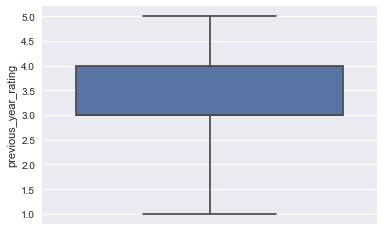

In [36]:
Train_data["previous_year_rating"].describe()

ax = sns.boxplot(y = Train_data["previous_year_rating"],whis=[1,99.00])

m    38496
f    16312
Name: gender, dtype: int64


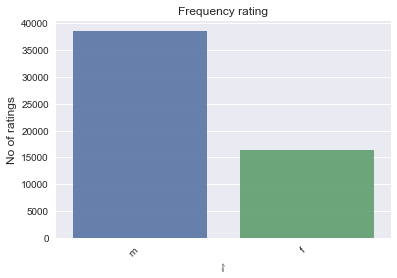

In [37]:
print(Train_data["gender"].value_counts())

payout_count= Train_data["gender"].value_counts()
sns.set(style="darkgrid")
chart= sns.barplot(payout_count.index, payout_count.values, alpha=0.9)

plt.title('Frequency rating')
plt.ylabel('No of ratings', fontsize=12)
plt.xlabel('ratings', fontsize=3,rotation="vertical")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

In [38]:
##DECOUPLING THE TARGET

In [39]:
y= Train_data["is_promoted"]
X= Train_data.drop(['is_promoted'] ,axis=1)
X2_test = Test_data

In [40]:
##CONVERTING OBJECT INTO CATEGORY

In [41]:
category_columns_train= X.select_dtypes(include='object').columns

In [42]:
category_columns_train

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [43]:
X[category_columns_train] = X[category_columns_train].apply(lambda x: x.astype('category'))

In [44]:
category_columns_test= X2_test.select_dtypes(include='object').columns

In [45]:
X2_test[category_columns_test] =X2_test[category_columns_test].apply(lambda x: x.astype('category'))

In [46]:
##DUMMIFICATION IS DONE TO CATEGORICAL VARIABLES

In [47]:
X_train= pd.get_dummies(X)
print(X_train.shape)

(54808, 60)


In [48]:
X_train.head()

,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,education_bench,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,"previous_year_rating_bin_(-5.0, -1.0]","previous_year_rating_bin_(-1.0, 0.0]","previous_year_rating_bin_(0.0, 1.0]","previous_year_rating_bin_(1.0, 5.0]"
employee_id,,,,,,,,,,,,,,,,,,,,,
55910,3.329256,0,0,88,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
26877,1.000000,0,0,85,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
28997,5.000000,1,0,82,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
58178,1.000000,0,0,84,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
65932,4.000000,0,0,86,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [49]:
X1_test= pd.get_dummies(X2_test)

In [50]:

print(X2_test.shape)

(23490, 10)


In [51]:
X_train.dtypes

previous_year_rating                     float64
KPIs_met >80%                              int64
awards_won?                                int64
avg_training_score                         int64
department_Analytics                       uint8
department_Finance                         uint8
department_HR                              uint8
department_Legal                           uint8
department_Operations                      uint8
department_Procurement                     uint8
department_R&D                             uint8
department_Sales & Marketing               uint8
department_Technology                      uint8
region_region_1                            uint8
region_region_10                           uint8
region_region_11                           uint8
region_region_12                           uint8
region_region_13                           uint8
region_region_14                           uint8
region_region_15                           uint8
region_region_16    

In [52]:
X1_test.dtypes

previous_year_rating                     float64
KPIs_met >80%                              int64
awards_won?                                int64
avg_training_score                         int64
department_Analytics                       uint8
department_Finance                         uint8
department_HR                              uint8
department_Legal                           uint8
department_Operations                      uint8
department_Procurement                     uint8
department_R&D                             uint8
department_Sales & Marketing               uint8
department_Technology                      uint8
region_region_1                            uint8
region_region_10                           uint8
region_region_11                           uint8
region_region_12                           uint8
region_region_13                           uint8
region_region_14                           uint8
region_region_15                           uint8
region_region_16    

In [53]:
cols = ['previous_year_rating']
for col in cols:
   X_train[col] = X_train[col].apply(lambda x: int(x) if x == x else "")

In [54]:
cols = ['previous_year_rating']
for col in cols:
   X1_test[col] = X1_test[col].apply(lambda x: int(x) if x == x else "")

In [55]:
numcol= X.select_dtypes(include="number").columns.tolist()
catcol= X.select_dtypes(exclude="number").columns.tolist()
print(numcol)
print(catcol)

['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
['department', 'region', 'education', 'gender', 'recruitment_channel', 'previous_year_rating_bin']


In [56]:
##DOING STANDARDIZATION FOR NUMERIC VALUES

In [57]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X_train[numcol])
X_train[numcol] = standardizer.transform(X_train[numcol])

In [58]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X1_test[numcol])
X1_test[numcol] = standardizer.transform(X1_test[numcol])

In [59]:
X1_test.shape

(23490, 60)

In [60]:
X_train.shape

(54808, 60)

In [61]:
##TRAIN-TEST SPLIT

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20,random_state=1234)

In [63]:
print(" Shape of Train data features :" , X_train.shape)
print(" Shape of Train data target   :" , X_test.shape)
print(" Shape of test data features  :" , y_train.shape)
print(" Shape of test data target    :" , y_test.shape)

 Shape of Train data features : (43846, 60)
 Shape of Train data target   : (10962, 60)
 Shape of test data features  : (43846,)
 Shape of test data target    : (10962,)


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
def train_metrics(y_train,train_pred):
    print("Train")
   # print(accuracy_score(y_train,train_pred))
    print(f1_score(y_train,train_pred,average= "micro"))
    print(confusion_matrix(y_train,train_pred))
    print(classification_report(y_train,train_pred))
    
def validation_metrics(y_validation ,validation_pred):
    print("Validation")
    #print(accuracy_score(y_validation,validation_pred))
    print(f1_score(y_validation,validation_pred,average= "macro"))
    print(confusion_matrix(y_validation,validation_pred))
    print(classification_report(y_validation,validation_pred))
    
def validation_metrics(y_test,test_pred):
    print("Test")
   # print(accuracy_score(y_test,test_pred))
    print(f1_score(y_test,test_pred,average= "macro"))
    print(confusion_matrix(y_test,test_pred))
    print(classification_report(y_test,test_pred))

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio='auto', random_state=1234, k_neighbors=3)
            
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [66]:
##BUILDING DIFFERENT MODELS

In [67]:
##LOGISTIC MODEL

In [68]:
from sklearn.linear_model import LogisticRegression
# Model initilization
lm = LogisticRegression()
# Model training
lm.fit(X_train, y_train)
# Model predictions
lm_train_pred = lm.predict(X_train)
lm_test_pred = lm.predict(X_test)

In [69]:
train_pred =   lm.predict(X_train)
test_pred=lm.predict(X_test)

In [70]:
train_metrics(train_pred,y_train)
validation_metrics(y_test,test_pred)

Train
0.9320348492450851
[[39899  2776]
 [  204   967]]
             precision    recall  f1-score   support

          0       0.99      0.93      0.96     42675
          1       0.26      0.83      0.39      1171

avg / total       0.98      0.93      0.95     43846

Test
0.6810782768681789
[[9983   54]
 [ 682  243]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     10037
          1       0.82      0.26      0.40       925

avg / total       0.93      0.93      0.92     10962



In [71]:
##Gaussian

In [72]:
from sklearn.naive_bayes import GaussianNB
Naive_model = GaussianNB()
Naive_model.fit(X_train,y_train)

GaussianNB(priors=None)

In [73]:
train_pred =   Naive_model.predict(X_train)
validation_pred=Naive_model.predict(X_test)

In [74]:
train_metrics(train_pred,y_train)
validation_metrics(validation_pred,y_test)

Train
0.4698946312092323
[[17578   718]
 [22525  3025]]
             precision    recall  f1-score   support

          0       0.44      0.96      0.60     18296
          1       0.81      0.12      0.21     25550

avg / total       0.65      0.47      0.37     43846

Test
0.40398010285469793
[[4400  173]
 [5637  752]]
             precision    recall  f1-score   support

          0       0.44      0.96      0.60      4573
          1       0.81      0.12      0.21      6389

avg / total       0.66      0.47      0.37     10962



In [75]:
##DECISION TREES

In [76]:
from sklearn import tree
dt1_gini = tree.DecisionTreeClassifier()   ## Instantiating DecisionTree-Classifier
dt1_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
print('Train Accuracy =',dt1_gini.score(X_train, y_train))
print('Test Accuracy =',dt1_gini.score(X_test, y_test))

Train Accuracy = 0.9793139625051316
Test Accuracy = 0.9103265827403758


In [78]:
y_adapred_validation=dt1_gini.predict(X_test)
y_adapred_train=dt1_gini.predict(X_train)

In [79]:
train_metrics(y_adapred_train,y_train)
validation_metrics(y_adapred_validation,y_test)

Train
0.9793139625051316
[[40055   859]
 [   48  2884]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     40914
          1       0.77      0.98      0.86      2932

avg / total       0.98      0.98      0.98     43846

Test
0.6993230780048695
[[9581  527]
 [ 456  398]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95     10108
          1       0.43      0.47      0.45       854

avg / total       0.91      0.91      0.91     10962



In [80]:
import graphviz
dot_data = tree.export_graphviz(dt1_gini, out_file=None, feature_names=X_train.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt1_gini") 

'dt1_gini.pdf'

In [81]:
dt2_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth =15)
dt2_entropy.fit(X_train, y_train)
print('Train Accuracy =',dt2_entropy.score(X_train, y_train))
print('Test Accuracy =',dt2_entropy.score(X_test, y_test))

Train Accuracy = 0.9496191214706017
Test Accuracy = 0.9385148695493523


In [82]:
dot_data = tree.export_graphviz(dt2_entropy, out_file=None,feature_names=X_train.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt2_entropy_maxdept5")

'dt2_entropy_maxdept5.pdf'

In [83]:
dt3_fraction15 = tree.DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=0.11)
dt3_fraction15.fit(X_train, y_train)
print('Train Accuracy =',dt3_fraction15.score(X_train, y_train))
print('Test Accuracy =',dt3_fraction15.score(X_test, y_test))

Train Accuracy = 0.9146330338001186
Test Accuracy = 0.9156175880313812


In [84]:
dot_data = tree.export_graphviz(dt3_fraction15, out_file=None,feature_names=X_train.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt3_fraction15")

'dt3_fraction15.pdf'

In [85]:
##AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
Adaboost_model=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=12,min_samples_split=3),
    n_estimators = 100,
    learning_rate = 0.1) #no of models is n_estimators
Adaboost_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=100, random_state=None)

In [88]:
y_adapred_validation=Adaboost_model.predict(X_test)
y_adapred_train=Adaboost_model.predict(X_train)

In [89]:
train_metrics(y_train,y_adapred_train)
validation_metrics(y_test,y_adapred_validation)

Train
0.9793139625051316
[[39871   232]
 [  675  3068]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     40103
          1       0.93      0.82      0.87      3743

avg / total       0.98      0.98      0.98     43846

Test
0.6870129544028831
[[9697  340]
 [ 589  336]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95     10037
          1       0.50      0.36      0.42       925

avg / total       0.91      0.92      0.91     10962



In [90]:
##RANDOM FOREST

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [92]:
rfc=RandomForestClassifier(class_weight= 'balanced',max_depth=45,max_features='sqrt') 
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=45, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [93]:
rfcpred_test=rfc.predict(X_test)
rfcpred_train=rfc.predict(X_train)

In [94]:
train_metrics(y_train,rfcpred_train)
validation_metrics(y_test,rfcpred_test)

Train
0.9641244355243351
[[39003  1100]
 [  473  3270]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98     40103
          1       0.75      0.87      0.81      3743

avg / total       0.97      0.96      0.97     43846

Test
0.6697475848438039
[[9598  439]
 [ 594  331]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     10037
          1       0.43      0.36      0.39       925

avg / total       0.90      0.91      0.90     10962



In [95]:
##XGBOOST

In [96]:
import re
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor
from xgboost import XGBClassifier

In [97]:
from sklearn.metrics import accuracy_score
import re

##for regular expressions and insensitive during the pattern compile

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

from sklearn.metrics import f1_score
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [98]:
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
      nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBmodel.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [99]:
XGB_pred_test=XGBmodel.predict(X_test)
XGB_pred_train=XGBmodel.predict(X_train)

C:\Users\THOUSEEF\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\THOUSEEF\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [100]:
train_metrics(y_train,XGB_pred_train)
validation_metrics(y_test,XGB_pred_test)

Train
0.939082242393833
[[40080    23]
 [ 2648  1095]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     40103
          1       0.98      0.29      0.45      3743

avg / total       0.94      0.94      0.92     43846

Test
0.7084067040185277
[[10032     5]
 [  656   269]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     10037
          1       0.98      0.29      0.45       925

avg / total       0.94      0.94      0.92     10962



In [101]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
y_pred = XGBmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, XGBmodel.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, XGBmodel.predict_proba(X_train)[:,1]))

C:\Users\THOUSEEF\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[10032     5]
 [  656   269]]
Accuracy_score: 93.97% on test dataset
precision_score: 98.18% on test dataset
recall_score: 29.08% on test dataset
f1_score: 44.87% on test dataset
roc_auc test set 0.90164957225832
roc_auc training set 0.9062445228116812


In [102]:
#ROC CURVE FOR XGB MODEL

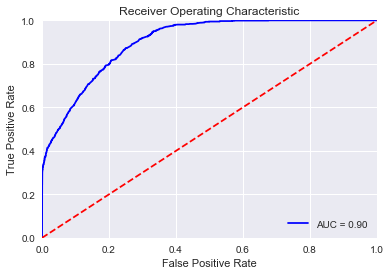

In [103]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = XGBmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
##ROC CURVE FOR DECISION TREES

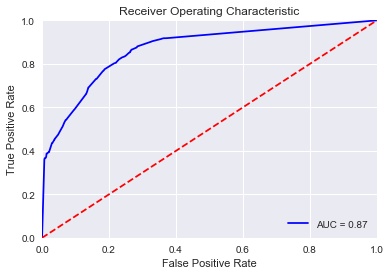

In [105]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt2_entropy.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
##F1_SCORE FOR ADABOOST AND ROC CURVE FOR ADABOOST

In [107]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
y_pred = Adaboost_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, Adaboost_model.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, Adaboost_model.predict_proba(X_train)[:,1]))

[[9697  340]
 [ 589  336]]
Accuracy_score: 91.53% on test dataset
precision_score: 49.70% on test dataset
recall_score: 36.32% on test dataset
f1_score: 41.97% on test dataset
roc_auc test set 0.8197927129081857
roc_auc training set 0.996653550982789


In [108]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
y_pred = dt2_entropy.predict(X_test)

print(confusion_matrix(y_test, y_pred))
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, dt2_entropy.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, dt2_entropy.predict_proba(X_train)[:,1]))

[[9949   88]
 [ 586  339]]
Accuracy_score: 93.85% on test dataset
precision_score: 79.39% on test dataset
recall_score: 36.65% on test dataset
f1_score: 50.15% on test dataset
roc_auc test set 0.8685833766415614
roc_auc training set 0.9363967732327835


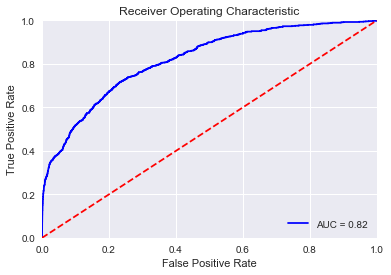

In [109]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = Adaboost_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
Submission = pd.DataFrame()


In [111]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
y_pred = dt1_gini.predict(X_test)

print(confusion_matrix(y_test, y_pred))
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, dt1_gini.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, dt1_gini.predict_proba(X_train)[:,1]))

[[9581  456]
 [ 527  398]]
Accuracy_score: 91.03% on test dataset
precision_score: 46.60% on test dataset
recall_score: 43.03% on test dataset
f1_score: 44.74% on test dataset
roc_auc test set 0.711095002544639
roc_auc training set 0.996654949998544


In [112]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
y_pred = lm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, lm.predict_proba(X_train)[:,1]))

[[9983   54]
 [ 682  243]]
Accuracy_score: 93.29% on test dataset
precision_score: 81.82% on test dataset
recall_score: 26.27% on test dataset
f1_score: 39.77% on test dataset
roc_auc test set 0.8720225974704405
roc_auc training set 0.8755448874904534


In [113]:
test = dt2_entropy.predict(X1_test)
Submission["is_promoted"]= test
Submission.to_csv("Submit.csv")

In [114]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, rfc.predict_proba(X_train)[:,1]))

[[9598  439]
 [ 594  331]]
Accuracy_score: 90.58% on test dataset
precision_score: 42.99% on test dataset
recall_score: 35.78% on test dataset
f1_score: 39.06% on test dataset
roc_auc test set 0.8021041066971127
roc_auc training set 0.990066175377191
